In [4]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model, model_from_json
from keras.optimizers import RMSprop,Adam,SGD
from keras.layers import Activation, Dropout, Flatten, Dense, GlobalMaxPooling2D, Conv2D, MaxPooling2D
from keras.callbacks import CSVLogger
from keras.wrappers.scikit_learn import KerasClassifier
from livelossplot.keras import PlotLossesCallback
import efficientnet.keras as efn
import h5py, glob
import numpy as np
import itertools
from cnn_utils import *
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
from sklearn.metrics import classification_report, confusion_matrix

from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

np.random.seed(1)

# Load Data

In [5]:
datapath = 'datasets/88x120/*.hdf5'
all_data = glob.glob(datapath)

data_10 = h5py.File(all_data[0], "r")
data_24 = h5py.File(all_data[1], "r")
data_77 = h5py.File(all_data[2], "r")
data_tobb = h5py.File(all_data[3], "r")

# test_path4 = 'Tobb_dataset/tobb_dataset_128x128.hdf5' # file path for TOBB data  
# testset4   = h5py.File(test_path4, "r")

X_train_10 = np.array(data_10["train_img"])
Y_train_10 = np.array(data_10["train_labels"])
# X_valid_orig = np.array(validset["valid_img"])
# Y_valid_orig = np.array(validset["valid_labels"])
X_test_10 = np.array(data_10["test_img"])
Y_test_10 = np.array(data_10["test_labels"])
print('1. Dataset''s Number of training samples: ', len(Y_train_10))
# print('1. Radar''s Number of validation samples: ', len(X_valid_orig))
print('1. Dataset''s Number of test samples: ', len(Y_test_10))

X_train_24 = np.array(data_24["train_img"])
Y_train_24 = np.array(data_24["train_labels"])
# X_valid_orig2 = np.array(validset2["valid_img"])
# Y_valid_orig2 = np.array(validset2["valid_labels"])
X_test_24 = np.array(data_24["test_img"])
Y_test_24 = np.array(data_24["test_labels"])
print('2. Dataset''s Number of training samples: ', len(X_train_24))
# print('2. Radar''s Number of validation samples: ', len(X_valid_orig2))
print('2. Dataset''s Number of test samples: ', len(X_test_24))

X_train_77 = np.array(data_77["train_img"])
Y_train_77 = np.array(data_77["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_77 = np.array(data_77["test_img"])
Y_test_77 = np.array(data_77["test_labels"])
print('3. Dataset''s Number of training samples: ', len(X_train_77))
# print('3. Radar''s Number of validation samples: ', len(X_valid_orig3))
print('3. Dataset''s Number of test samples: ', len(X_test_77))


X_train_tobb = np.array(data_tobb["train_img"])
Y_train_tobb = np.array(data_tobb["train_labels"])
# X_valid_orig3 = np.array(validset3["valid_img"])
# Y_valid_orig3 = np.array(validset3["valid_labels"])
X_test_tobb = np.array(data_tobb["test_img"])
Y_test_tobb = np.array(data_tobb["test_labels"])
print('4. Dataset''s Number of training samples: ', len(X_train_tobb))
# print('4. Radar''s Number of validation samples: ', len(X_valid_orig4))
print('4. Dataset''s Number of test samples: ', len(X_test_tobb))



data_10.close()
data_24.close()
data_77.close()
data_tobb.close()

1. Datasets Number of training samples:  588
1. Datasets Number of test samples:  147
2. Datasets Number of training samples:  1695
2. Datasets Number of test samples:  424
3. Datasets Number of training samples:  519
3. Datasets Number of test samples:  130
4. Datasets Number of training samples:  645
4. Datasets Number of test samples:  162


## Examine the shapes of data

In [6]:
num_class = 11

In [7]:
x_train_10 = X_train_10/255.
# X_valid = X_valid_orig/255.
x_test_10 = X_test_10/255.
y_train_10 = convert_to_one_hot(Y_train_10, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_10 = convert_to_one_hot(Y_test_10, num_class).T
print ("X_train_10 shape: " + str(x_train_10.shape))
print ("Y_train_10 shape: " + str(y_train_10.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_10 shape: " + str(x_test_10.shape))
print ("Y_test_10 shape: " + str(y_test_10.shape)+"\n\n")

x_train_24 = X_train_24/255.
# X_valid = X_valid_orig/255.
x_test_24 = X_test_24/255.
y_train_24 = convert_to_one_hot(Y_train_24, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_24 = convert_to_one_hot(Y_test_24, num_class).T
print ("X_train_24 shape: " + str(x_train_24.shape))
print ("Y_train_24 shape: " + str(y_train_24.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_24 shape: " + str(x_test_24.shape))
print ("Y_test_24 shape: " + str(y_test_24.shape)+"\n\n")

x_train_77 = X_train_77/255.
# X_valid = X_valid_orig/255.
x_test_77 = X_test_77/255.
y_train_77 = convert_to_one_hot(Y_train_77, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_77 = convert_to_one_hot(Y_test_77, num_class).T
print ("X_train_77 shape: " + str(x_train_77.shape))
print ("Y_train_77 shape: " + str(y_train_77.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_77 shape: " + str(x_test_77.shape))
print ("Y_test_77 shape: " + str(y_test_77.shape)+"\n\n")


x_train_tobb = X_train_tobb/255.
# X_valid = X_valid_orig/255.
x_test_tobb = X_test_tobb/255.
y_train_tobb = convert_to_one_hot(Y_train_tobb, num_class).T
# Y_valid = convert_to_one_hot(Y_valid_orig, num_class).T
y_test_tobb = convert_to_one_hot(Y_test_tobb, num_class).T
print ("X_train_tobb shape: " + str(x_train_tobb.shape))
print ("Y_train_tobb shape: " + str(y_train_tobb.shape))
# print ("X_valid shape: " + str(X_valid.shape))
# print ("Y_valid shape: " + str(Y_valid.shape))
print ("X_test_tobb shape: " + str(x_test_tobb.shape))
print ("Y_test_tobb shape: " + str(y_test_tobb.shape)+"\n\n")

X_train_10 shape: (588, 88, 120, 3)
Y_train_10 shape: (588, 11)
X_test_10 shape: (147, 88, 120, 3)
Y_test_10 shape: (147, 11)


X_train_24 shape: (1695, 88, 120, 3)
Y_train_24 shape: (1695, 11)
X_test_24 shape: (424, 88, 120, 3)
Y_test_24 shape: (424, 11)


X_train_77 shape: (519, 88, 120, 3)
Y_train_77 shape: (519, 11)
X_test_77 shape: (130, 88, 120, 3)
Y_test_77 shape: (130, 11)


X_train_tobb shape: (645, 88, 120, 3)
Y_train_tobb shape: (645, 11)
X_test_tobb shape: (162, 88, 120, 3)
Y_test_tobb shape: (162, 11)




# Select Dataset

In [8]:
# set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz and '3' for 4GHz USRP TOBB Data
def select_data(flag):

    if flag==0:
        X_Train = x_train_10
        Y_Train = y_train_10
    #     X_valid = X_valid
    #     Y_valid = Y_valid
        X_Test = x_test_10
        Y_Test = y_test_10
        radar = 10
    elif flag==1:
        X_Train = x_train_24
        Y_Train = y_train_24
    #     X_valid = X_valid2
    #     Y_valid = Y_valid2
        X_Test = x_test_24
        Y_Test = y_test_24
        radar = 24
    elif flag==2: 
        X_Train = x_train_77
        Y_Train = y_train_77
    #     X_valid = X_valid3
    #     Y_valid = Y_valid3
        X_Test = x_test_77
        Y_Test = y_test_77
        radar = 77
    elif flag==3: 
        X_Train = x_train_tobb
        Y_Train = y_train_tobb
    #     X_valid = X_valid4
    #     Y_valid = Y_valid4
        X_Test = x_test_tobb
        Y_Test = y_test_tobb
        radar = 4 
    return radar, X_Train, Y_Train, X_Test, Y_Test

## Define Plotting & Saving Function

In [9]:
def plot_fig(i, history):
    fig = plt.figure()
    plt.plot(range(1,EPOCHS+1),history.history['accuracy'],label='Training')
    plt.plot(range(1,EPOCHS+1),history.history['val_accuracy'],label='Validation')
    plt.legend(loc=0)
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.xlim([1,EPOCHS])
    plt.grid(True)
    plt.title("Model Accuracy")
    plt.show()
    fig.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-acc.png')
    plt.close(fig)
    # summarize history for loss
    fig2 = plt.figure()
    plt.plot(range(1,EPOCHS+1),history.history['loss'],label='Training')
    plt.plot(range(1,EPOCHS+1),history.history['val_loss'],label='Validation')
    plt.legend(loc=0)
    plt.title('Model Loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.xlim([1,EPOCHS])
    plt.grid(True)
    plt.legend(['Train', 'Validation'], loc='upper left')
    plt.show()
    fig2.savefig('results/Model'+str(i)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'-loss.png')
    plt.close(fig2)

# Load Trained Models

In [10]:
radar = 77 # 10 , 24, 4, or 77
model_file = "models/88x120 CAE/"+str(radar)+" GHz 11_class CAE.json"
weights_file = "models/88x120 CAE/"+str(radar)+" GHz 11_class CAE.h5"
# model_file = "models/Tobb_12_class_CAE_4GHz.json"
# weights_file = "models/Tobb_12_class_CAE_4GHz.h5"

json_file = open(model_file, 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights(weights_file)
print("Loaded model from disk")
loaded_model.summary()

Loaded model from disk
Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 88, 120, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 88, 120, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 88, 120, 32)  7808        input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 88, 120, 64)  0           conv2d_1[0][0]                   
                                                                 conv

## Create New Model

In [11]:
# layer_name = 'max_pooling2d_6'
# model2 = Model(inputs=loaded_model.input , outputs=loaded_model.get_layer(layer_name).output)
model2 = Model(inputs=loaded_model.input , outputs=loaded_model.layers[12].output)
model2.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 88, 120, 3)   0                                            
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 88, 120, 32)  896         input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_2 (Conv2D)               (None, 88, 120, 32)  7808        input_1[0][0]                    
__________________________________________________________________________________________________
concatenate_1 (Concatenate)     (None, 88, 120, 64)  0           conv2d_1[0][0]                   
                                                                 conv2d_2[0][0]             

## Freeze conv layers and add fully connected layers

In [9]:
drop = 0.5 #.5
model = Sequential()

model.add(model2)
model.add(Flatten())
model.add(Dense(150, activation='relu'))
model.add(Dropout(drop))


model.add(Dense(150, activation='relu'))
model.add(Dropout(drop))

model.add(Dense(num_class))
model.add(Activation('softmax'))


# Freeze the layers except the last 7 layers
# for layer in model.layers[:-7]:
#     layer.trainable = False

# Check the trainable status of the individual layers
for layer in model.layers:
    print(layer, layer.trainable)
print('Network Summary')
model.summary()

<keras.engine.training.Model object at 0x000002482637F408> True
<keras.layers.core.Flatten object at 0x00000248263974C8> True
<keras.layers.core.Dense object at 0x00000248263976C8> True
<keras.layers.core.Dropout object at 0x00000249D29D1448> True
<keras.layers.core.Dense object at 0x00000249D29B6A88> True
<keras.layers.core.Dropout object at 0x00000249D29FAB88> True
<keras.layers.core.Dense object at 0x00000249D2AA9748> True
<keras.layers.core.Activation object at 0x00000249D2A1B448> True
Network Summary
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
model_1 (Model)              (None, 11, 15, 64)        377472    
_________________________________________________________________
flatten_1 (Flatten)          (None, 10560)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               1584150   
_____

## Re-train Pre-trained Models

In [10]:
# Hyperparams
EPOCHS = 100
BATCH_SIZE = 32
num_class = 11

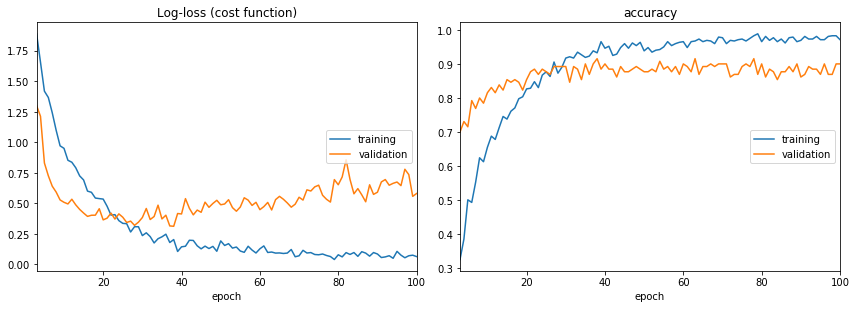

Log-loss (cost function):
training   (min:    0.040, max:    2.411, cur:    0.064)
validation (min:    0.313, max:    2.279, cur:    0.581)

accuracy:
training   (min:    0.133, max:    0.988, cur:    0.971)
validation (min:    0.169, max:    0.915, cur:    0.900)


In [11]:
lr = 0.001
flag = 2 # set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz, '3' for tobb 4ghz
(radar, X_train, Y_train, X_test, Y_test) = select_data(flag)
# optim = Adam(lr=lr, decay=1e-06) # decay rate = 5e-06 for xethru
optim = Adam(lr=lr) # decay rate = 5e-06 for xethru
# compile the model


# [radar, X_train, Y_train, X_test, Y_test] = select_data(flag) 
# X_train = X_train3
# Y_train = Y_train3
# X_test = X_test2
# Y_test = Y_test2
model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])

# fit the model
history = model.fit(X_train, Y_train,
                batch_size=BATCH_SIZE,
                epochs=EPOCHS,
                verbose=1,
                validation_data=(X_test, Y_test),
                callbacks = [PlotLossesCallback()]
                     )

# Grid Search

In [ ]:
# fit the model
# Params: epochs= 200, batch_size= 32, dense_size= 256, learn_rate= 0.001, Accuracy=0.8781725764274597
# Params: epochs= 100, batch_size= 8, dense_size= 100, learn_rate= 0.0005, Accuracy=0.9153845906257629
flag = 2 # set flag: '0' for 10ghz, '1' for 24ghz, '2' for 77ghz, '3' for tobb 4ghz
(radar, X_train, Y_train, X_test, Y_test) = select_data(flag)
epochs = [100,150,200]
batch_size = [8, 16, 32, 64]
dense_size = [100, 150, 256]
learn_rate = [0.001, 0.0005, 0.0001, 0.0002]
acc_hist = []
drop = 0.5
for i in range(len(epochs)):
    for j in range(len(batch_size)):
        for k in range(len(dense_size)):
            for m in range(len(learn_rate)):
                model = Sequential()

                model.add(model2)
                model.add(Flatten())
                model.add(Dense(dense_size[k], activation='relu'))
                model.add(Dropout(drop))


                model.add(Dense(dense_size[k], activation='relu'))
                model.add(Dropout(drop))

                model.add(Dense(num_class))
                model.add(Activation('softmax'))
                
                optim = Adam(lr=learn_rate[m]) # decay rate = 5e-06 for xethru
                model.compile(loss='categorical_crossentropy', optimizer=optim, metrics=['accuracy'])
                history = model.fit(X_train, Y_train,
                                batch_size=batch_size[j],
                                epochs=epochs[i],
                                verbose=0,
                                validation_data=(X_test, Y_test)
#                                 callbacks = [PlotLossesCallback()]
                                     )
                acc = history.history['val_accuracy'][-1]
                acc_hist.append(acc)
                print('Params: '+'epochs= '+str(epochs[i])+', batch_size= '+str(batch_size[j])+', dense_size= '+
                     str(dense_size[k])+', learn_rate= '+str(learn_rate[m])+', Accuracy='+str(acc))

Params: epochs= 100, batch_size= 8, dense_size= 100, learn_rate= 0.001, Accuracy=0.8846153616905212
Params: epochs= 100, batch_size= 8, dense_size= 100, learn_rate= 0.0005, Accuracy=0.9153845906257629
Params: epochs= 100, batch_size= 8, dense_size= 100, learn_rate= 0.0001, Accuracy=0.8769230842590332
Params: epochs= 100, batch_size= 8, dense_size= 100, learn_rate= 0.0002, Accuracy=0.8769230842590332
Params: epochs= 100, batch_size= 8, dense_size= 150, learn_rate= 0.001, Accuracy=0.8615384697914124
Params: epochs= 100, batch_size= 8, dense_size= 150, learn_rate= 0.0005, Accuracy=0.892307698726654
Params: epochs= 100, batch_size= 8, dense_size= 150, learn_rate= 0.0001, Accuracy=0.892307698726654
Params: epochs= 100, batch_size= 8, dense_size= 150, learn_rate= 0.0002, Accuracy=0.9076923131942749
Params: epochs= 100, batch_size= 8, dense_size= 256, learn_rate= 0.001, Accuracy=0.8846153616905212
Params: epochs= 100, batch_size= 8, dense_size= 256, learn_rate= 0.0005, Accuracy=0.892307698726

## Confusion Matrix

In [ ]:
import pandas as pd
import seaborn as sn

predictions = model.predict(X_test)
Y_pred = np.argmax(predictions, axis=1)
Y_test_int = np.argmax(Y_test, axis=1)
#print(predictions[0:5])
#print(Y_pred[0:5])
#print(Y_test_int[0:5])
data = {'y_Predicted': Y_pred,
        'y_Actual':    Y_test_int
        }

df = pd.DataFrame(data, columns=['y_Actual','y_Predicted'])
confusion_matrix = pd.crosstab(df['y_Actual'], df['y_Predicted'], rownames=['Actual'], colnames=['Predicted'], margins = False)
fig3 = plt.figure()
sn.heatmap(confusion_matrix, annot=True)
#fig3.savefig('results/CAE/Conf_Model'+str(radar)+'_'+str(radar)+'GHz'+'_Batchsize'+str(BATCH_SIZE)+'_learning'+str(lr)+'_dropout'+str(drop)+'.png')
#plt.close(fig3)